In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anm

In [37]:
mutable struct World
    objects
    debug
    ani
end

World() = World([], false, nothing)
World(debug) = World([], debug, nothing)

function append(self::World, obj)
    push!(self.objects, obj)
end

function draw(self::World)
    fig, ax = subplots()
    ax.set_aspect("equal")
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_xlabel("X", fontsize=20)
    ax.set_ylabel("Y", fontsize=20)
    ax.text(-4.4, 4.5, "t = 10", fontsize=10)
    elems = []

    if self.debug
        for i = 1:1000
            one_step(self, i, elems, ax)
        end
    else
        self.ani = anm.FuncAnimation(fig, one_step, fargs=(self, elems, ax), frames=10, interval=1000, repeat=false)
    end 
    
end

function one_step(self::World, i, elems, ax)
    ax.text(-4.4, 4.5, "t = $i", fontsize=10)
end

one_step (generic function with 1 method)

In [38]:
world = World(false)

World(Any[], false, nothing)

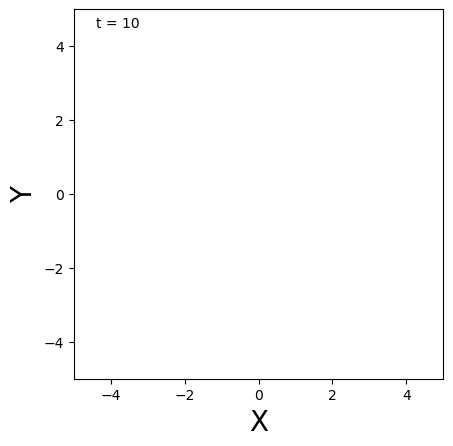

PyObject <matplotlib.animation.FuncAnimation object at 0x7ffdc106e370>

In [39]:
draw(world)